In [1]:
# %load ~/ipyhead
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
lm22 = pd.read_csv('LM22.txt', sep='\t').set_index('Gene symbol')
lm22.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
Gene symbol,,,,,,,,,,,,,,,,,,,,,
ABCB4,555.713449,10.744235,7.225819,4.311280,4.605860,7.406442,8.043976,6.469993,7.833082,9.312295,...,6.202496,7.951360,27.557710,121.432277,114.636747,4.872184,4.727985,34.113659,15.030530,14.906888
ABCB9,15.603544,22.094787,653.392328,24.223723,35.671507,30.048192,38.455423,17.604795,46.073657,19.715722,...,20.309426,56.251887,29.380878,40.390260,123.993305,23.384603,53.466757,23.615746,29.786442,33.679147
ACAP1,215.305951,321.621021,38.616872,1055.613378,1790.097170,922.152747,340.883424,1107.798265,1995.482601,280.075719,...,190.879024,48.972217,30.974254,23.055150,61.386550,26.412923,104.200198,73.607932,696.442802,596.025961
ACHE,15.117949,16.648847,22.123737,13.428288,27.187732,18.444927,13.441268,14.805542,24.652712,33.658448,...,16.375268,13.692963,1373.069620,48.585761,16.715474,193.159977,13.948778,20.501249,40.414927,22.766494
ACP5,605.897384,1935.201479,1120.104684,306.312519,744.656599,557.819820,248.546932,711.949744,958.916018,493.969120,...,512.931382,13644.172300,1062.475909,7633.960182,13825.053630,3989.865169,263.497930,323.381277,860.563374,307.142798


In [3]:
print lm22.shape

(547, 22)


In [23]:
# GSE11103_matrix_pure
abbas = pd.read_csv('curated_data/pure_samples/abbas/abbas.pure.ann.tsv', sep='\t')
print abbas.shape
del abbas['Row.names']
del abbas['ACCNUM']
del abbas['DESC']
del abbas['X.Sample_title']
abbas = abbas.dropna(subset=['SYMBOL']).set_index('SYMBOL')
print abbas.shape
abbas.head()

(54681, 17)
(19856, 12)


,PRB12534.Jurkat,PRB12535.Jurkat,PRB12536.Jurkat,PRB12537.IM.9,PRB12538.IM.9,PRB12539.IM.9,PRB12540.Raji,PRB12541.Raji,PRB12542.Raji,PRB12543.THP.1,PRB12544.THP.1,PRB12545.THP.1
SYMBOL,,,,,,,,,,,,
RFC2,2104.464,1913.695,1974.465,2428.428,2232.343,2470.156,831.009,713.614,1164.667,1658.769,1290.185,1516.727
HSPA6,189.528,110.972,160.200,432.932,261.238,280.899,184.187,178.548,158.211,216.398,202.340,187.029
PAX8,1753.889,1291.766,1885.517,1561.437,1534.517,1540.394,1666.894,1625.360,1860.036,1975.209,1423.538,1748.505
GUCA1A,19.085,12.050,60.760,15.171,56.276,16.242,45.300,55.810,49.121,30.585,39.566,25.296
THRA,103.615,107.866,87.683,69.714,66.984,59.192,97.665,43.950,83.112,104.709,107.779,70.616


In [67]:
abbas_classes = pd.read_csv('curated_data/pure_samples/abbas/classes.tsv', sep='\t', header=None)
abbas_classes.columns = ['label', 'type']
abbas_classes.head()

,label,type
0,Jurkat,Tcell
1,IM-9,Bcell
2,Raji,Bcell
3,THP-1,monocyte


In [68]:
abbas_classes_2 = {'Jurkat': 'Tcell', 'IM.9': 'Bcell', 'Raji': 'Bcell', 'THP.1': 'monocyte'}
# for l in open('curated_data/pure_samples/abbas/classes.tsv', 'r').readlines():
#     x,y = l.strip().split('\t')
#     abbas_classes[x] = y
abbas_classes_2

{'IM.9': 'Bcell', 'Jurkat': 'Tcell', 'Raji': 'Bcell', 'THP.1': 'monocyte'}

In [26]:
abbas = abbas.rename(columns=lambda x:  abbas_classes_2[x[x.index('.')+1:].strip()] + '.' + x[:x.index('.')])
abbas.head()

,Tcell.PRB12534,Tcell.PRB12535,Tcell.PRB12536,Bcell.PRB12537,Bcell.PRB12538,Bcell.PRB12539,Bcell.PRB12540,Bcell.PRB12541,Bcell.PRB12542,monocyte.PRB12543,monocyte.PRB12544,monocyte.PRB12545
SYMBOL,,,,,,,,,,,,
RFC2,2104.464,1913.695,1974.465,2428.428,2232.343,2470.156,831.009,713.614,1164.667,1658.769,1290.185,1516.727
HSPA6,189.528,110.972,160.200,432.932,261.238,280.899,184.187,178.548,158.211,216.398,202.340,187.029
PAX8,1753.889,1291.766,1885.517,1561.437,1534.517,1540.394,1666.894,1625.360,1860.036,1975.209,1423.538,1748.505
GUCA1A,19.085,12.050,60.760,15.171,56.276,16.242,45.300,55.810,49.121,30.585,39.566,25.296
THRA,103.615,107.866,87.683,69.714,66.984,59.192,97.665,43.950,83.112,104.709,107.779,70.616


In [27]:
abbas_big = pd.read_csv('Abbas2009Basis.tsv', sep='\t')
#abbas_big.head()
print abbas_big.shape
del abbas_big['AFFY']
del abbas_big['ENTREZID']
del abbas_big['Name']
abbas_big = abbas_big.dropna(subset=['SYMBOL']).set_index('SYMBOL')
print abbas_big.shape
abbas_big = abbas_big.rename(columns=lambda x: x+' AbbasBig')
abbas_big.head()

(359, 21)
(282, 17)


,Th AbbasBig,Th.act AbbasBig,Tc AbbasBig,Tc.act AbbasBig,B AbbasBig,B.act AbbasBig,B.aIgM AbbasBig,Mem.IgG AbbasBig,Mem.IgM AbbasBig,PC AbbasBig,NK AbbasBig,NK.act AbbasBig,mono AbbasBig,mono.act AbbasBig,DC AbbasBig,DC.act AbbasBig,neutro AbbasBig
SYMBOL,,,,,,,,,,,,,,,,,
ZFP36L2,5213.9,625.69,860.42,267.090,1040.900,563.830,248.180,422.510,430.730,170.090,944.540,829.88,947.230,303.250,768.000,224.490,685.290
NR4A2,1407.8,247.46,19.61,143.090,50.766,112.380,322.400,202.340,365.710,42.580,16.994,108.10,62.992,220.110,49.329,100.960,106.700
PER1,1079.4,104.49,189.22,154.500,57.445,81.581,162.010,48.368,116.490,31.034,102.670,116.49,189.110,128.720,103.000,82.624,72.219
AK5,1379.6,330.29,203.27,52.567,50.005,48.406,38.379,69.450,65.663,55.256,199.320,175.49,27.348,33.242,26.782,42.736,114.440
NR4A2,6951.0,389.67,369.90,408.860,1149.100,388.400,630.630,1875.900,3071.500,448.050,192.380,340.33,209.660,263.310,151.630,182.990,1779.900


In [82]:
# i ran small abbas through cib
# > java -Xmx3g -Xms3g -jar CIBERSORT.jar -M ../infil/curated_data/pure_samples/abbas/GSE11103_matrix_mixtures.txt -P ~/infil/curated_data/pure_samples/abbas/GSE11103_matrix_pure.txt -c ~/infil/curated_data/pure_samples/abbas/GSE11103_matrix_classes.txt -n 100 -v -q 0.3 -k 999 -m 50 -x 150 -f True
abbas_small_cib = pd.read_csv('curated_data/pure_samples/abbas/GSE11103_matrix_classes.GSE11103_matrix_pure.bm.K999.0.txt', sep='\t')
abbas_small_cib = abbas_small_cib.set_index('NAME')
del abbas_small_cib['Unnamed: 5']
abbas_small_cib.head()

,Jurkat,IM-9,Raji,THP-1
NAME,,,,
1405_i_at,5.001285,7555.742929,51.601585,976.250196
1552390_a_at,448.153578,10.632512,8.965634,9.133562
1552623_at,7.257142,524.942394,1600.549433,56.445531
1552774_a_at,8.494169,8.202436,443.070266,5.749483
1553179_at,230.333387,5.412534,12.031507,3.367254


In [83]:
abbas_classes = {}
for key in abbas_classes_2:
    abbas_classes[key.replace('.', '-')] = abbas_classes_2[key]
abbas_classes, abbas_small_cib.columns

({'IM-9': 'Bcell', 'Jurkat': 'Tcell', 'Raji': 'Bcell', 'THP-1': 'monocyte'},
 Index([u'Jurkat', u'IM-9', u'Raji', u'THP-1'], dtype='object'))

In [84]:
abbas_small_cib = abbas_small_cib.rename(columns=lambda x: abbas_classes[x.strip()] + ' ' + 'CIB')
abbas_small_cib.head()

,Tcell CIB,Bcell CIB,Bcell CIB,monocyte CIB
NAME,,,,
1405_i_at,5.001285,7555.742929,51.601585,976.250196
1552390_a_at,448.153578,10.632512,8.965634,9.133562
1552623_at,7.257142,524.942394,1600.549433,56.445531
1552774_a_at,8.494169,8.202436,443.070266,5.749483
1553179_at,230.333387,5.412534,12.031507,3.367254


## pairwise pearson correlation

between cibersort lm22 and abbas (dropped all that wasn't annotated with gene)

In [12]:
sns.set_context('poster')

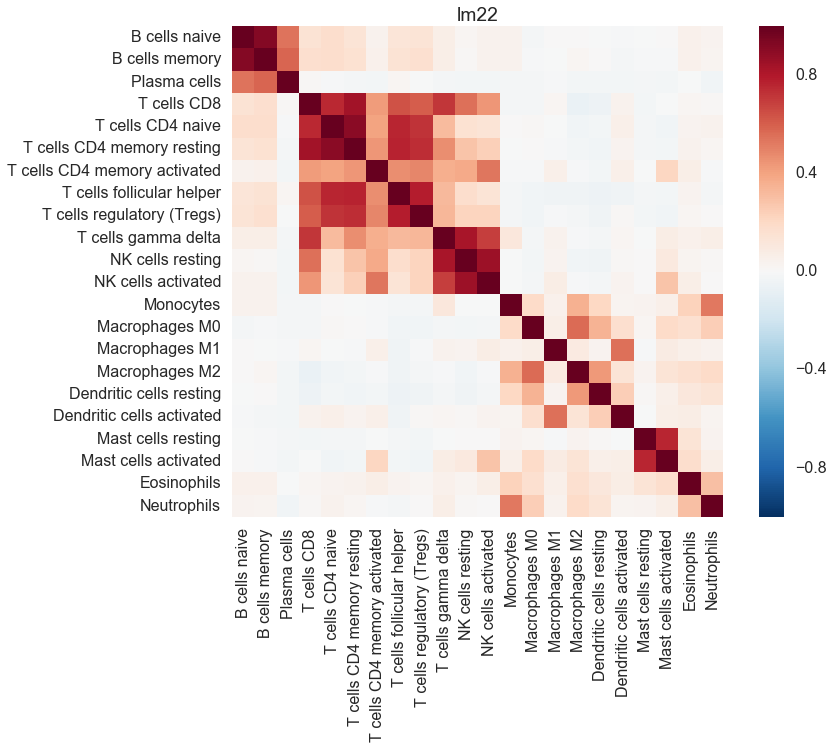

In [13]:
sns.heatmap(lm22.corr(), square=True) # vmax=.8, square=True)
plt.title('lm22')
plt.savefig('plots/lm22.corr.png', dpi=300)

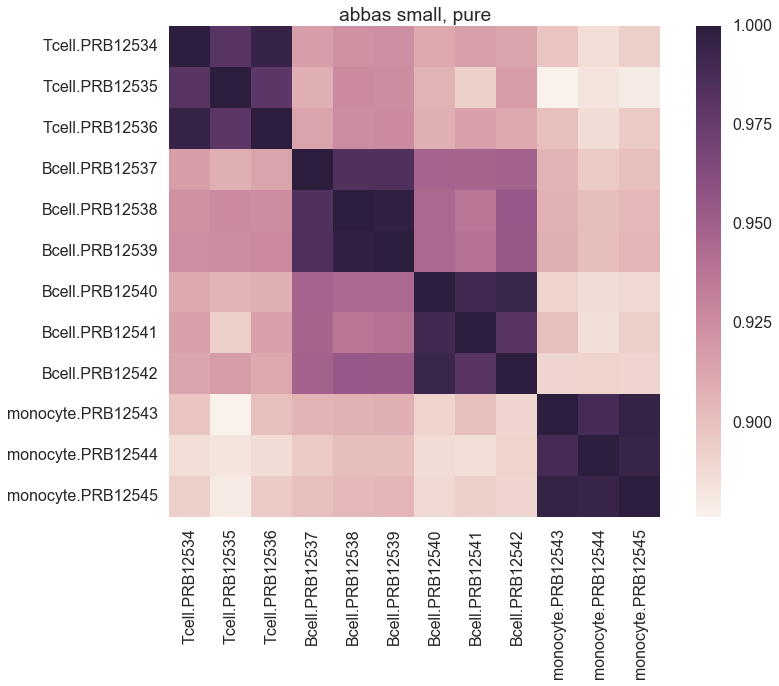

In [86]:
sns.heatmap(abbas.corr(), square=True) # , vmax=.8, square=True)
plt.title('abbas small, pure')
plt.savefig('plots/abbas.corr.png', dpi=300)

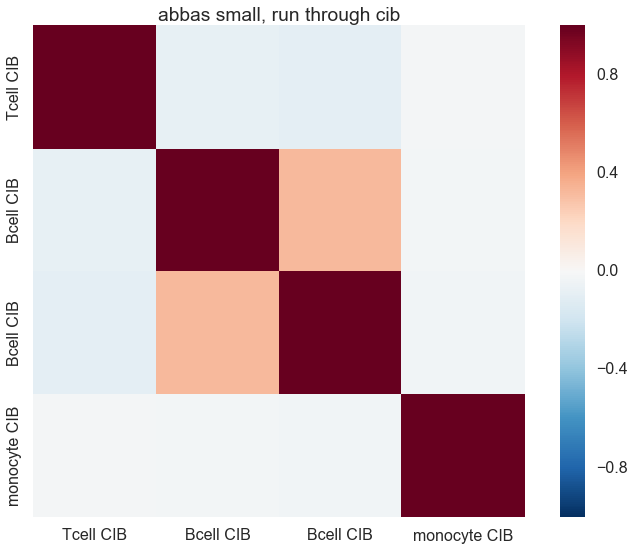

In [87]:
sns.heatmap(abbas_small_cib.corr(), square=True) # , vmax=.8, square=True)
plt.title('abbas small, run through cib')
plt.savefig('plots/abbas.cib.corr.png', dpi=300)

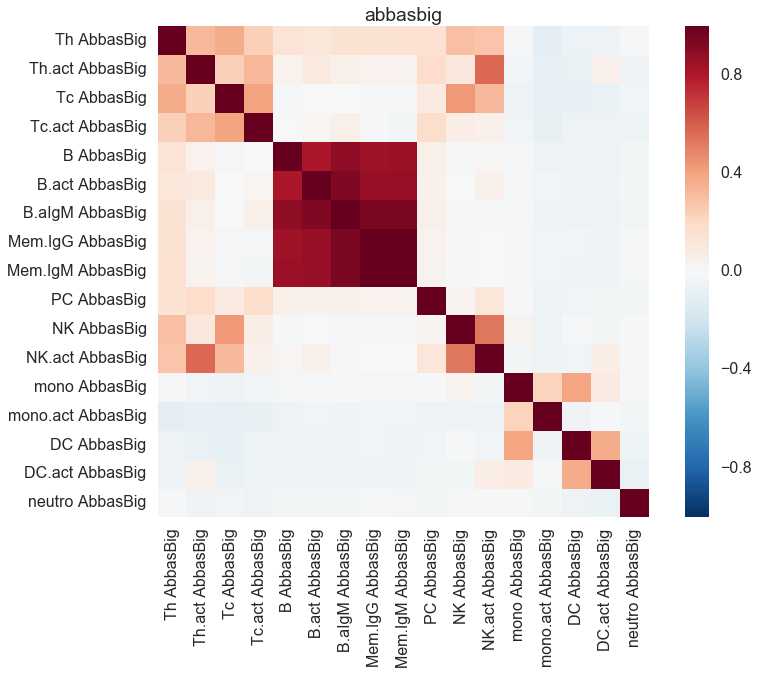

In [29]:
sns.heatmap(abbas_big.corr(), square=True) # , vmax=.8, square=True)
plt.title('abbasbig')
plt.savefig('plots/abbas_big.corr.png', dpi=300)

Abbas has really poor differentiation! Look at the scale above.

Abbas_big is better but look at all that confusion of IgG, B cells

Combine the matrices (all genes, not just intersecting):

In [30]:
lm22.shape, abbas.shape, abbas_big.shape, pd.concat([lm22,abbas, abbas_big]).shape

((547, 22), (19856, 12), (282, 17), (20685, 51))

In [31]:
print 'intersecting number of genes: ', len(set(lm22.index.values) & set(abbas.index.values) & set(abbas_big.index.values))

intersecting number of genes:  58


In [32]:
merge_all = pd.merge(lm22,abbas,how='outer', left_index=True, right_index=True)
merge_all = pd.merge(merge_all,abbas_big,how='outer', left_index=True, right_index=True)
merge_all.shape

(20053, 51)

In [34]:
merge_all = merge_all[sorted(merge_all.columns)] # sort alphabetically

In [35]:
merged_corr = merge_all.corr()
merged_corr.shape

(51, 51)

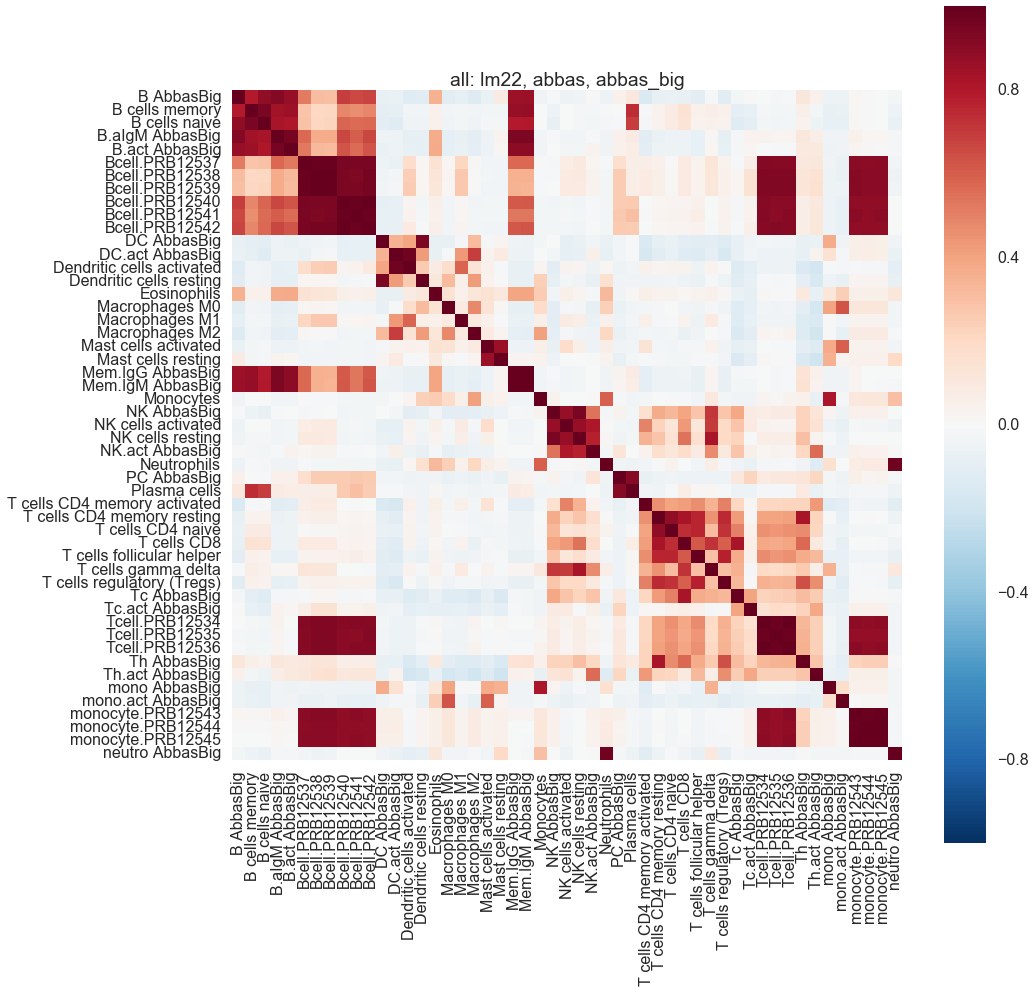

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(merged_corr, square=True) # , vmax=.8, square=True)
plt.title('all: lm22, abbas, abbas_big')
plt.savefig('plots/lm22_abbas_abbasbig.corr.png', dpi=300)

Abbas has some good correlations with cibersort for T cells and B cells. But also for weird things like macrophages.

The basis matrices from different datasets still have correlations as expected. Nice


## Hierarchical clustering

Done in R (`makeclusters.R`). Abbas was too big. [But worked for lm22.](lm22.pdf)
Everything seems to be in the right places, except T cells gamma delta. (Note that we removed those from another dataset because they had healthy tissue expression?)

We see in hierarchical clustering and in pairwise pearson correlation matrix that the following classes are very similar:

* B cells memory, naive
* T cells CD4 naive, CD4 memory resting

Let's look at what happens to lm22 condition number and to lower right corner of SVD when we remove those similar classes.
(Not worth doing this for abbas because everything is so similar...)



### before removal

In [62]:
np.linalg.cond(lm22.as_matrix())

11.384737399244891

In [65]:
u,s,v = np.linalg.svd(lm22.as_matrix())
s

array([ 134342.29568181,   99772.27010228,   97201.82311938,
         83208.31755805,   80715.17258234,   72092.7845973 ,
         55933.08760617,   49447.68101414,   44307.20458633,
         42437.7879798 ,   39782.04913879,   37355.13095713,
         32217.51278543,   28599.02757464,   25081.72145598,
         22971.52425634,   21407.9547764 ,   21322.09988806,
         15815.39923219,   15049.87509563,   13491.33749551,
         11800.21031409])

### after removal

In [66]:
lm22.columns

Index([u'B cells naive', u'B cells memory', u'Plasma cells', u'T cells CD8', u'T cells CD4 naive', u'T cells CD4 memory resting', u'T cells CD4 memory activated', u'T cells follicular helper', u'T cells regulatory (Tregs)', u'T cells gamma delta', u'NK cells resting', u'NK cells activated', u'Monocytes', u'Macrophages M0', u'Macrophages M1', u'Macrophages M2', u'Dendritic cells resting', u'Dendritic cells activated', u'Mast cells resting', u'Mast cells activated', u'Eosinophils', u'Neutrophils'], dtype='object')

In [67]:
cols = list(lm22.columns)
cols.remove('B cells memory')
cols.remove('T cells CD4 memory resting')

In [68]:
lm22_filtered = lm22[cols]

In [69]:
assert lm22_filtered.shape[1] < lm22.shape[1]

In [70]:
np.linalg.cond(lm22_filtered.as_matrix())

9.2966631216693258

In [71]:
u,s,v = np.linalg.svd(lm22_filtered.as_matrix())
s

array([ 129807.31399193,   97306.43707906,   90071.05927375,
         82890.57268306,   77748.13198545,   70804.34454334,
         55899.28619088,   44455.50546437,   42838.09619048,
         42417.33088031,   39700.98291713,   37198.62643993,
         32215.662482  ,   27680.0238095 ,   24780.05268638,
         22647.53762505,   21360.04540006,   21247.22362694,
         15243.14467023,   13962.78560308])


Outcome: condition number improves when we remove these classes in particular.

### repeating with big abbas matrix

We want to cluster them all together and see if clustering still follows cell types.

In [37]:
import scipy.spatial.distance as ssd
import scipy.cluster.hierarchy as sch

In [39]:
col_dist = ssd.squareform(ssd.pdist(merge_all.as_matrix().T))

In [56]:
col_Z = sch.linkage(col_dist, 'single')

In [43]:
col_idxing = sch.leaves_list(col_Z)

In [57]:
col_Z

array([[  0.,  50.,  inf,   2.],
       [ 27.,  51.,  inf,   3.],
       [ 28.,  52.,  inf,   4.],
       [ 29.,  53.,  inf,   5.],
       [ 30.,  54.,  inf,   6.],
       [ 31.,  55.,  inf,   7.],
       [ 32.,  56.,  inf,   8.],
       [ 33.,  57.,  inf,   9.],
       [ 34.,  58.,  inf,  10.],
       [ 35.,  59.,  inf,  11.],
       [ 36.,  60.,  inf,  12.],
       [ 26.,  61.,  inf,  13.],
       [ 37.,  62.,  inf,  14.],
       [ 39.,  63.,  inf,  15.],
       [ 40.,  64.,  inf,  16.],
       [ 41.,  65.,  inf,  17.],
       [ 42.,  66.,  inf,  18.],
       [ 43.,  67.,  inf,  19.],
       [ 44.,  68.,  inf,  20.],
       [ 45.,  69.,  inf,  21.],
       [ 46.,  70.,  inf,  22.],
       [ 47.,  71.,  inf,  23.],
       [ 48.,  72.,  inf,  24.],
       [ 38.,  73.,  inf,  25.],
       [ 49.,  74.,  inf,  26.],
       [ 25.,  75.,  inf,  27.],
       [ 23.,  76.,  inf,  28.],
       [  1.,  77.,  inf,  29.],
       [  2.,  78.,  inf,  30.],
       [  3.,  79.,  inf,  31.],
       [  

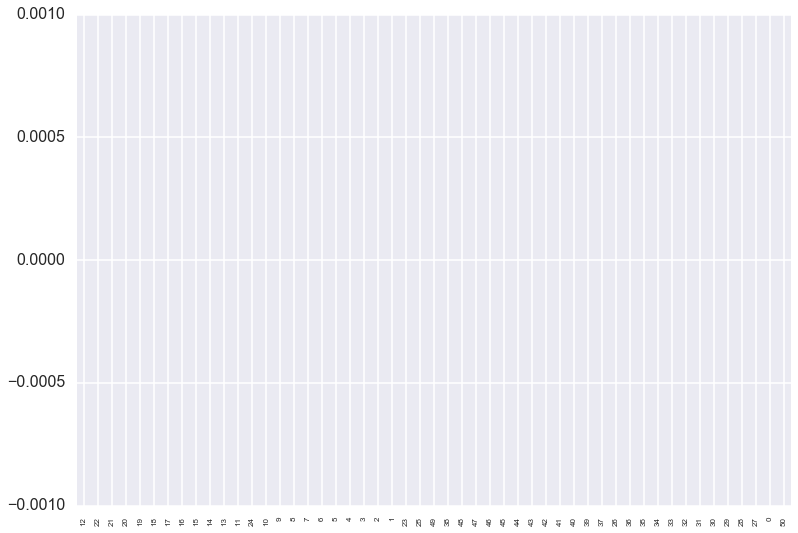

In [61]:
plt.figure()
dn=hierarchy.dendrogram(col_Z,leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels)
                          )

In [54]:
from scipy.cluster import hierarchy


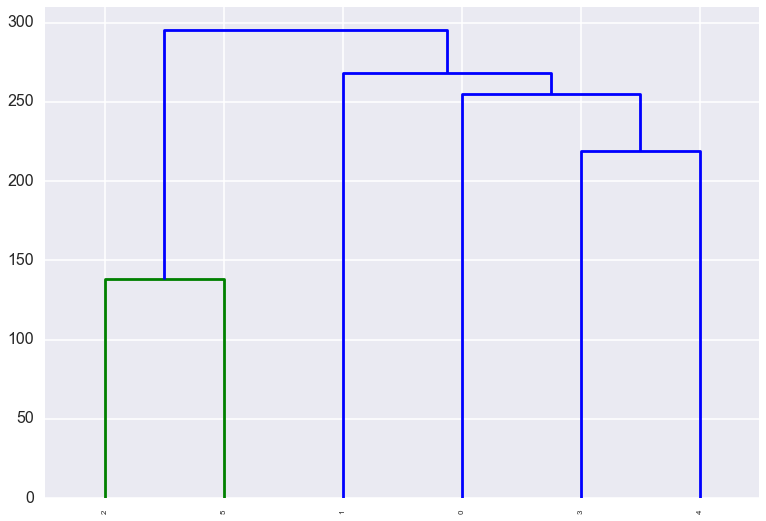

In [60]:
ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 268.,
                   400., 754., 564., 138., 219., 869., 669.])
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z, leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels)
                          )

## confusion matrix from euclidean distance

In [13]:
from scipy.spatial import distance
a = (1,2,3)
b = (4,5,6)
print distance.euclidean(a,b)
print np.linalg.norm(np.array(a) - np.array(b))

5.19615242271
5.19615242271
